
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 600.  Construct portfolios from the 600 stocks in the S&P 600 small cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp600-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='3 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,AAP,"Advance Auto Parts, Inc.",US Stocks:Consumer Discretionary,-93.95,-58.39,-51.16,-41.64,-20.97,77.85,62.88,45.36,48.69,43.72,-41.64,48.69,-2027.45
1,AAT,American Assets Trust,US Stocks:Real Estate,-58.95,-70.79,-0.10,-13.33,-8.00,23.92,14.50,25.47,30.51,32.59,-13.33,30.51,-406.70
2,ABCB,Ameris Bancorp,US Stocks:Financials,-83.65,-47.45,24.82,8.85,17.11,27.19,20.11,29.65,37.74,35.68,8.85,37.74,0.23
3,ABG,Asbury Automotive Group,US Stocks:Consumer Discretionary,-95.86,-34.60,9.49,7.64,23.20,31.28,25.50,41.35,36.92,41.30,7.64,36.92,0.21
4,ABM,"ABM Industries, Inc.",US Stocks:Industrials,-78.34,-53.29,14.10,1.96,10.08,46.19,35.10,25.96,26.59,33.23,1.96,26.59,0.07
5,ABR,Arbor Realty Trust,US Stocks:Financials,-51.96,-36.39,8.09,0.37,14.20,55.66,46.60,23.20,41.52,40.61,0.37,41.52,0.01
6,ACA,"Arcosa, Inc.",US Stocks:Industrials,-92.38,-67.66,-2.42,12.39,16.24,41.47,30.15,35.47,30.20,28.25,12.39,30.20,0.41
7,ACAD,Acadia Pharmaceuticals,US Stocks:Healthcare,-65.00,-20.45,-12.41,-12.11,-15.66,38.49,27.42,34.87,47.28,49.09,-12.11,47.28,-572.56
8,ACIW,ACI Worldwide,US Stocks:Technology,34.78,-3.62,64.35,17.45,13.47,43.01,19.20,26.91,37.35,33.76,17.45,37.35,0.47
9,ACLS,"Axcelis Technologies, Inc.",US Stocks:Technology,-28.68,-65.86,-47.74,-3.83,21.04,46.17,31.78,43.42,57.35,53.00,-3.83,57.35,-219.65


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
327,MDU,"MDU Resources Group, Inc.",US Stocks:Utilities,13.82,-33.66,38.66,23.58,13.85,20.86,11.08,29.32,24.19,24.01,23.58,24.19,0.97
266,IDCC,"InterDigital, Inc.",US Stocks:Technology,47.77,59.27,109.03,53.42,37.12,28.32,14.63,35.00,47.10,41.34,53.42,47.10,1.13
138,CTRE,"CareTrust REIT, Inc.",US Stocks:Real Estate,253.74,-1.37,25.79,23.77,13.40,30.24,16.16,21.32,24.34,26.53,23.77,24.34,0.98
259,HWKN,"Hawkins, Inc.",US Stocks:Materials,-18.74,-55.60,50.17,34.72,43.18,35.16,19.59,44.41,39.18,35.92,34.72,39.18,0.89
412,POWL,"Powell Industries, Inc.",US Stocks:Industrials,-89.49,-76.69,9.65,101.66,48.29,57.22,40.31,65.73,69.47,59.77,101.66,69.47,1.46
11,ADMA,"ADMA Biologics, Inc.",US Stocks:Healthcare,515.52,-15.28,196.30,119.19,48.06,54.73,21.53,66.44,50.97,50.67,119.19,50.97,2.34
405,PJT,"PJT Partners, Inc.",US Stocks:Financials,-92.69,-40.67,43.44,35.46,29.60,33.01,28.33,36.12,30.07,27.49,35.46,30.07,1.18
47,AROC,"Archrock, Inc.",US Stocks:Energy,-64.97,-8.44,40.10,47.42,53.87,46.62,30.54,32.56,35.69,39.78,47.42,35.69,1.33
97,CALM,"Cal-Maine Foods, Inc.",US Stocks:Consumer Staples,-94.75,-57.45,47.57,31.07,21.90,58.46,47.99,33.99,28.77,26.99,31.07,28.77,1.08
55,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,-59.81,47.76,94.48,59.69,27.94,47.96,32.08,36.44,36.04,43.60,59.69,36.04,1.66


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MDU,IDCC,CTRE,HWKN,POWL,ADMA,PJT,AROC,CALM,ATGE,QNST,Ranked Portfolio
Annual Returns,23.58,53.42,23.77,34.72,101.66,119.19,35.46,47.42,31.07,59.69,16.16,46.45
Std Dev,24.19,47.10,24.34,39.18,69.47,50.97,30.07,35.69,28.77,36.04,42.44,26.14
Sharpe Ratio,0.97,1.13,0.98,0.89,1.46,2.34,1.18,1.33,1.08,1.66,0.38,1.78
Weight,0.18,0.14,0.13,0.10,0.05,0.09,0.07,0.07,0.04,0.06,0.06,1.00
Worst Typical Down Year,-24.80,-40.78,-24.91,-43.64,-37.28,17.25,-24.68,-23.96,-26.47,-12.39,-68.72,-5.84
Black Swan,-48.99,-87.88,-49.25,-82.82,-106.75,-33.72,-54.75,-59.65,-55.24,-48.43,-111.16,-31.98


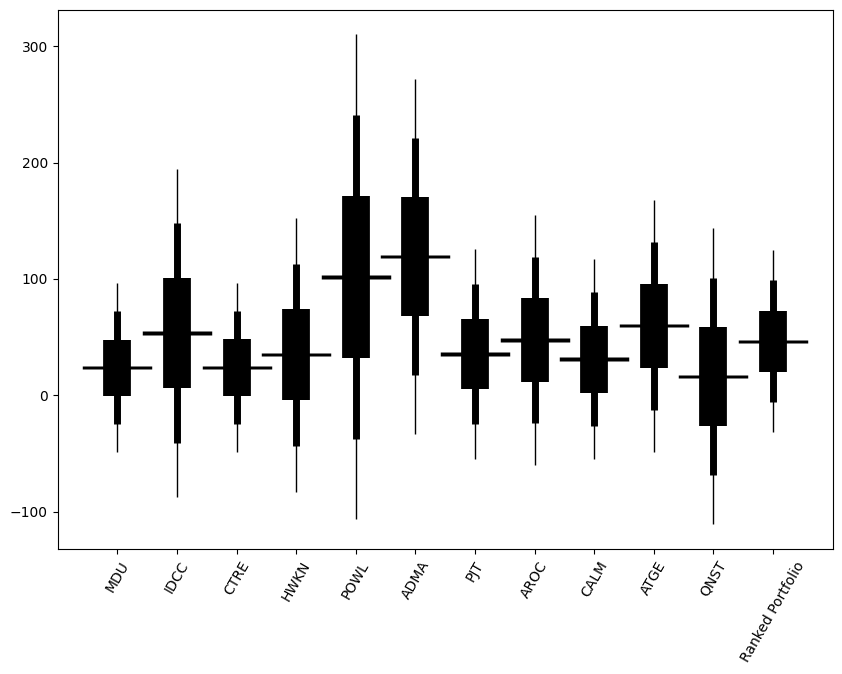

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

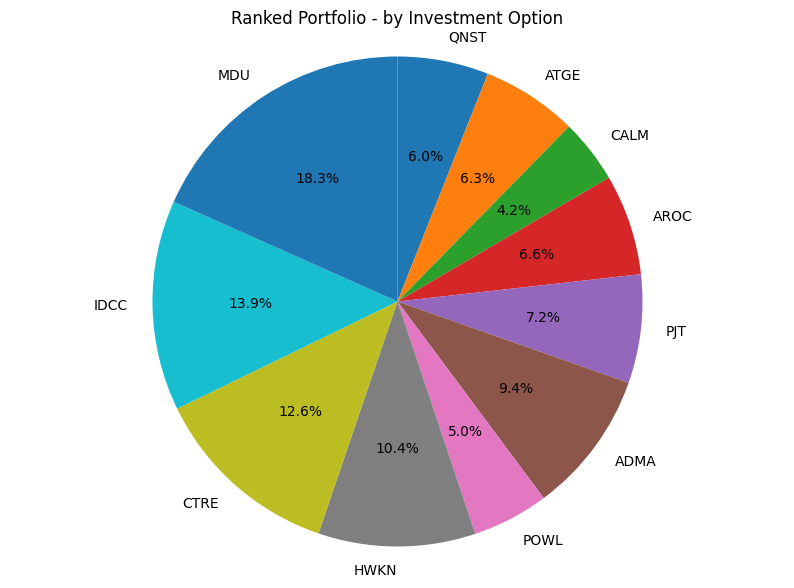

QNST   0.06
ATGE   0.06
CALM   0.04
AROC   0.07
PJT    0.07
ADMA   0.09
POWL   0.05
HWKN   0.10
CTRE   0.13
IDCC   0.14
MDU    0.18



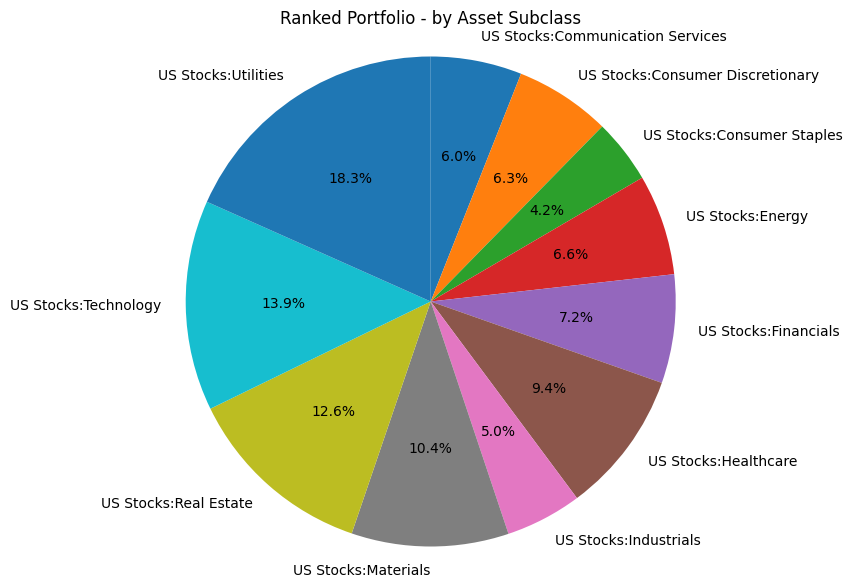

US Stocks:Communication Services   0.06
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.04
US Stocks:Energy                   0.07
US Stocks:Financials               0.07
US Stocks:Healthcare               0.09
US Stocks:Industrials              0.05
US Stocks:Materials                0.10
US Stocks:Real Estate              0.13
US Stocks:Technology               0.14
US Stocks:Utilities                0.18



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MDU                            0.1833
    IDCC                           0.1388
    CTRE                           0.1257
    HWKN                           0.1037
    POWL                           0.0504
    ADMA                           0.0943
    PJT                            0.0717
    AROC                           0.0665
    CALM                           0.0423
    ATGE                           0.0633
    QNST                           0.0601


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).